[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/upm-classes/aapi_2025/blob/main/03_texture.ipynb)

## Entropía

En teoría de la información, la entropía de la información proporciona información sobre la cantidad de información presente.

Para un vecindario dado dentro de una imagen, la entropía local proporciona información sobre cuán complejo es este vecindario. Para definir el vecindario, se utiliza un elemento estructurante o filtro. Este filtro permite detectar variaciones en la distribución local de niveles de gris.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import requests

from skimage.filters.rank import entropy
from skimage.morphology import disk

### Leer imagen

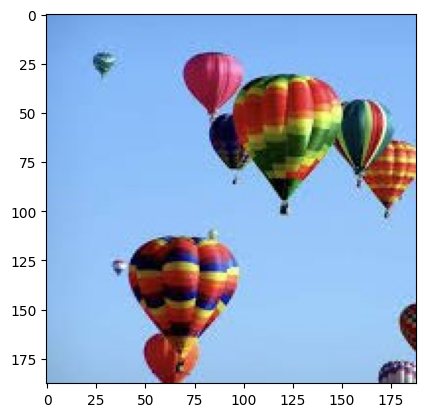

In [ ]:
url = 'https://raw.githubusercontent.com/upm-classes/aapi_2025/refs/heads/main/images/images_sq.jpg'

response = requests.get(url)

# Convertimos los bytes de la imagen en un arreglo numpy
img_array = np.asarray(bytearray(response.content), dtype=np.uint8)

# Decodificamos la imagen desde el array numpy utilizando cv2
image = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # obtain an RGB version

plt.imshow(image)
plt.show()

### Cálculo de la entropía local

La entropía local *H* en una vecindad de la imagen se calcula usando la fórmula de Shannon:

$$
H = - \sum_{i=0}^{N-1} p(i) \log_2 p(i)
$$

donde:
- *H* es la entropía local.
- *N* es el número total de niveles de intensidad posibles.
- *p(i)* es la probabilidad de ocurrencia del nivel de intensidad \( i \) dentro de la vecindad local.

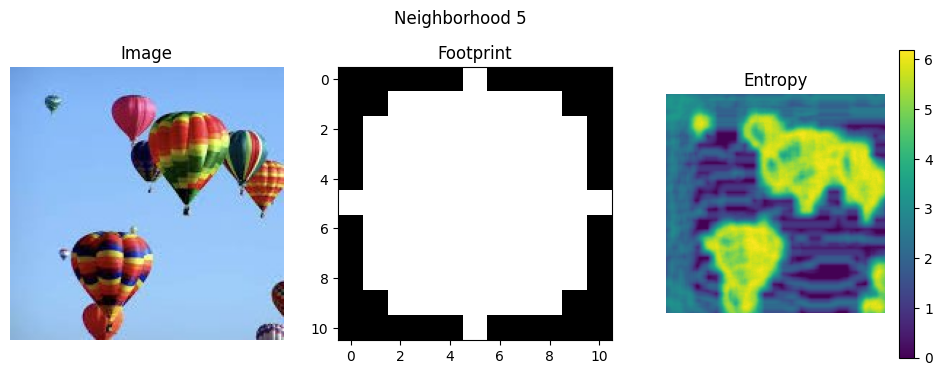

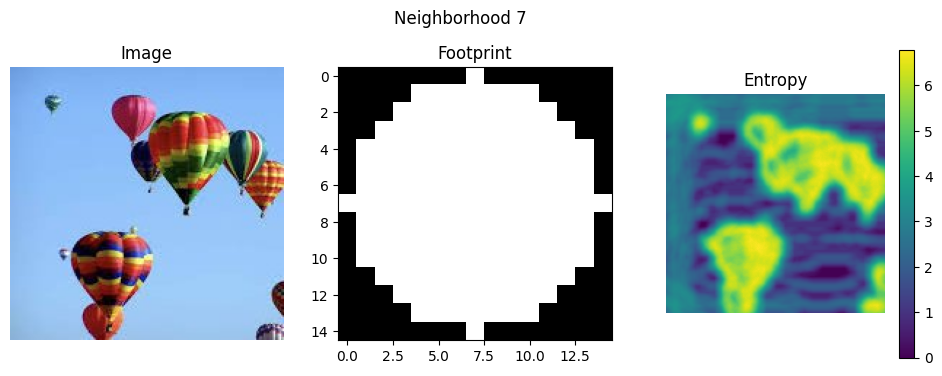

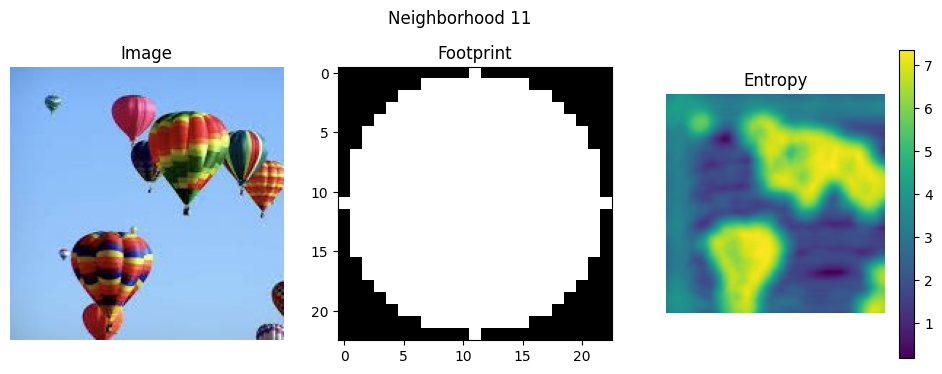

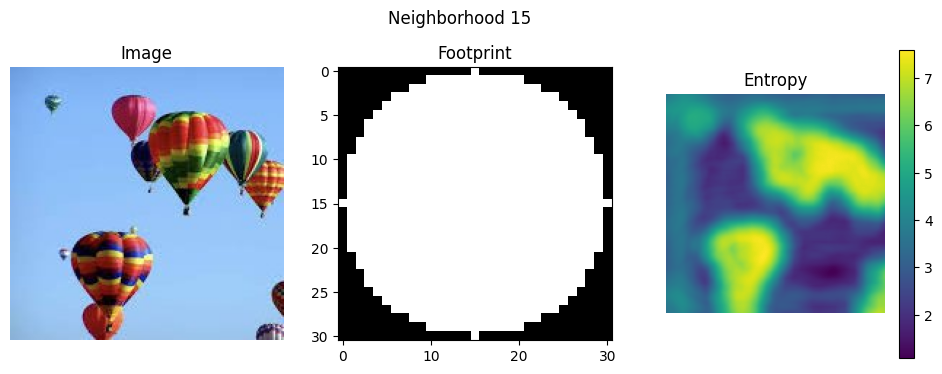

In [3]:
filter_sizes = [5, 7, 11, 15]

for n in filter_sizes:

  footprint = disk(n) # Neighborhood in which entropy is calculated

  im = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Convert to gray scale
  e = entropy(im, footprint) # Calculate local entropy

  fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 4))
  fig.suptitle(f'Neighborhood {n}')

  ax1.imshow(image)
  ax1.set_title("Image")
  ax1.axis("off")

  ax2.imshow(footprint, cmap='gray')
  ax2.set_title("Footprint")

  colbar = ax3.imshow(e, cmap='viridis')
  ax3.set_title("Entropy")
  ax3.axis("off")
  fig.colorbar(colbar, ax=ax3)

  #fig.tight_layout()
  plt.show()

## Características de Textura GLCM

Un GLCM (Matriz de Co-ocurrencia de Niveles de Gris, por sus siglas en inglés) describe la frecuencia con la que un nivel de gris aparece en una relación espacial específica con otro valor de gris dentro de un área de ventana dada.

Es una matriz cuadrada (𝐺) con dimensiones 𝑁𝑔, donde 𝑁𝑔 es el número de niveles de gris en la imagen.

Los parámetros de Haralick obtenidos a partir del GLCM permiten discriminar entre texturas. Algunos de los 14 parámetros de Haralick son: entropía, contraste, homogeneidad, correlación o disimilitud.

En este ejemplo, la relación espacial considerada ha sido:
distancia=[5]
y ángulos=[0]

La disimilitud y la correlación de dos texturas diferentes se extraen de una imagen: áreas de césped y áreas de cielo.

Este ejemplo ilustra la capacidad de las dos características calculadas para discriminar texturas.

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import requests
from skimage.feature import graycomatrix, graycoprops

### Leer Image

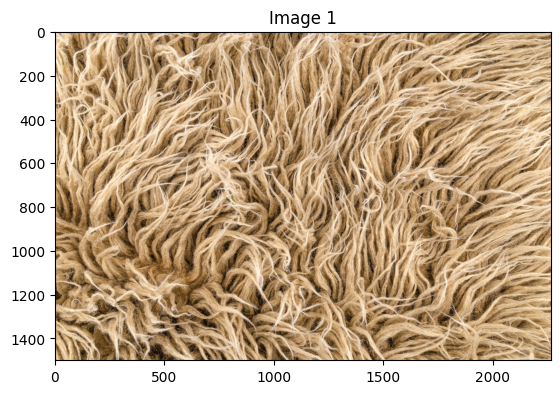

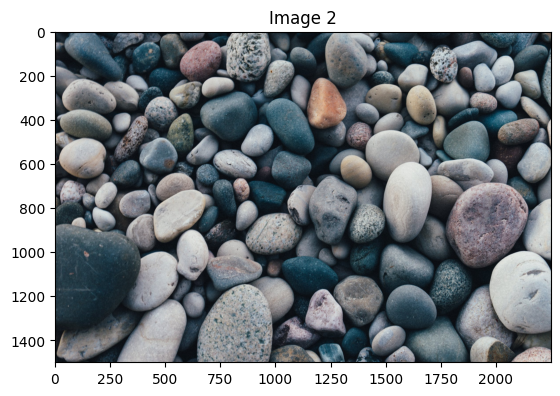

In [ ]:
url1 = 'https://raw.githubusercontent.com/upm-classes/aapi_2025/refs/heads/main/images/texture_1.jpeg'
response = requests.get(url1)
img_array = np.asarray(bytearray(response.content), dtype=np.uint8)
image1 = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

url2 = 'https://raw.githubusercontent.com/upm-classes/aapi_2025/refs/heads/main/images/texture_2.jpeg'
response = requests.get(url2)
img_array = np.asarray(bytearray(response.content), dtype=np.uint8)
image2 = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

plt.imshow(image1)
plt.title('Image 1')
plt.show()

plt.imshow(image2)
plt.title('Image 2')
plt.show()

#### GLCM

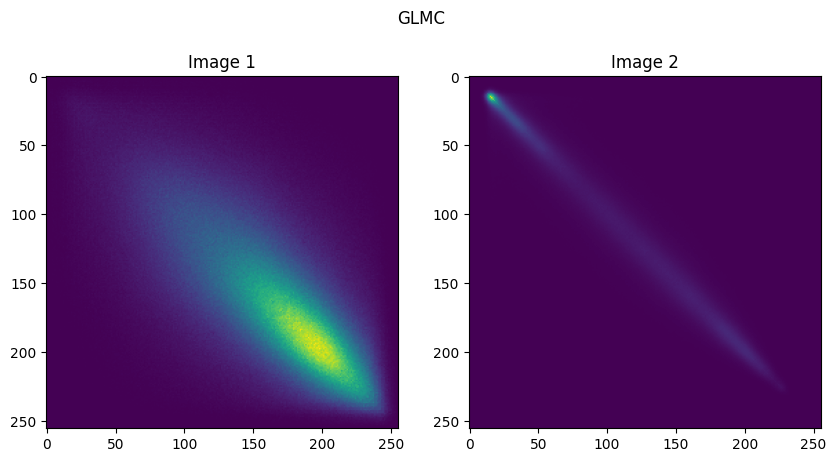

In [6]:
distances = [5]
angles = [0]

im1 = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)  # Convert to gray scale
glcm1 = graycomatrix(im1, distances=distances, angles=angles,
                     levels=256, symmetric=True, normed=True)

im2 = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)  # Convert to gray scale
glcm2 = graycomatrix(im2, distances=distances, angles=angles,
                     levels=256, symmetric=True, normed=True)

# Plot images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('GLMC')
ax1.imshow(np.squeeze(glcm1), cmap='viridis')
ax1.set_title('Image 1')
ax2.imshow(np.squeeze(glcm2), cmap='viridis')
ax2.set_title('Image 2')
plt.show()

####  Características de Textura

In [7]:
dissimilarity_1 = graycoprops(glcm1, 'dissimilarity')[0, 0]
correlation_1 = graycoprops(glcm1, 'correlation')[0, 0]

dissimilarity_2 = graycoprops(glcm2, 'dissimilarity')[0, 0]
correlation_2 = graycoprops(glcm2, 'correlation')[0, 0]

print(f'Image 1. Dissimilarity: {dissimilarity_1}. Correlation {correlation_1}')
print(f'Image 2. Dissimilarity: {dissimilarity_2}. Correlation {correlation_2}')

Image 1. Dissimilarity: 30.501406784660766. Correlation 0.6632005646805365
Image 2. Dissimilarity: 13.439208314773571. Correlation 0.9298050536048513
